In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trades_df = pd.read_csv("/content/historical_data.csv")


In [4]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [7]:
trades_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [63]:
sentiment_df['Classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [64]:
trades_df['Coin'].unique()

array(['BTC'], dtype=object)

In [8]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
# Renamimg for consistency

In [19]:
sentiment_df.columns = sentiment_df.columns.str.strip().str.capitalize()
trades_df.columns = trades_df.columns.str.strip()


In [20]:
print(sentiment_df.columns)


Index(['Timestamp', 'Value', 'Classification', 'Date'], dtype='object')


In [21]:
#Converting Sentiment Date & Trade Time

In [22]:
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"]).dt.date
sentiment_df = sentiment_df[["Date", "Classification"]]


In [23]:
print(trades_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [24]:
trades_df["Timestamp"] = pd.to_datetime(trades_df["Timestamp"])
trades_df["Date"] = trades_df["Timestamp"].dt.date


In [25]:
#Keeping only BTC

In [35]:
print("Sample sentiment dates:")
print(sentiment_df["Date"].unique()[:5])

print("\nSample trade dates:")
print(trades_df["Date"].unique()[:5])


Sample sentiment dates:
[datetime.date(2018, 2, 1) datetime.date(2018, 2, 2)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 5)]

Sample trade dates:
[datetime.date(1970, 1, 1)]


In [36]:
print(trades_df["Timestamp"].head())
print(trades_df["Timestamp IST"].head())


3001   1970-01-01 00:29:00
3002   1970-01-01 00:29:00
3003   1970-01-01 00:29:00
3004   1970-01-01 00:29:00
3005   1970-01-01 00:29:00
Name: Timestamp, dtype: datetime64[ns]
3001    17-03-2025 04:48
3002    17-03-2025 04:48
3003    17-03-2025 04:48
3004    17-03-2025 04:48
3005    17-03-2025 04:48
Name: Timestamp IST, dtype: object


In [37]:
trades_df["Timestamp IST"] = pd.to_datetime(
    trades_df["Timestamp IST"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)


In [38]:
trades_df["Date"] = trades_df["Timestamp IST"].dt.date


In [39]:
print(trades_df["Date"].unique()[:5])


[datetime.date(2025, 3, 17) datetime.date(2025, 3, 18)
 datetime.date(2025, 3, 19) datetime.date(2025, 3, 20)
 datetime.date(2025, 4, 7)]


In [40]:
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"]).dt.date


In [41]:
merged_df = pd.merge(
    trades_df,
    sentiment_df,
    on="Date",
    how="inner"
)

print("Merged rows:", len(merged_df))
merged_df.head()


Merged rows: 26064


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification
0,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.08585,7061.59,BUY,2025-03-17 04:48:00,0.00000,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,2.372694,7.470000e+14,1970-01-01 00:29:00,2025-03-17,Fear
1,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12157,9999.74,BUY,2025-03-17 04:48:00,0.08585,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.359912,7.020000e+13,1970-01-01 00:29:00,2025-03-17,Fear
2,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.00937,770.73,BUY,2025-03-17 04:48:00,0.20742,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,0.258964,1.970000e+14,1970-01-01 00:29:00,2025-03-17,Fear
3,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12372,10176.59,BUY,2025-03-17 04:48:00,0.21679,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.419333,1.090000e+15,1970-01-01 00:29:00,2025-03-17,Fear
4,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,2.64792,217804.66,BUY,2025-03-17 04:48:00,0.34051,Open Long,0.0,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,73.182364,3.470000e+13,1970-01-01 00:29:00,2025-03-17,Fear


In [42]:
analysis_df = merged_df[
    (merged_df["Closed PnL"] != 0) |
    (merged_df["Direction"].str.contains("Close", na=False))
].copy()


In [43]:
print("Rows after filtering closed trades:", len(analysis_df))
analysis_df["Closed PnL"].describe()


Rows after filtering closed trades: 11045


,Closed PnL
count,11045.000000
mean,78.591646
std,806.324008
min,-29370.119800
25%,0.063308
50%,5.028000
75%,46.400000
max,19530.522500


In [44]:
analysis_df.drop(columns=["Timestamp"], inplace=True)


In [45]:
analysis_df["win"] = analysis_df["Closed PnL"] > 0

analysis_df["return"] = analysis_df["Closed PnL"] / (
    analysis_df["Execution Price"] * analysis_df["Size Tokens"]
)


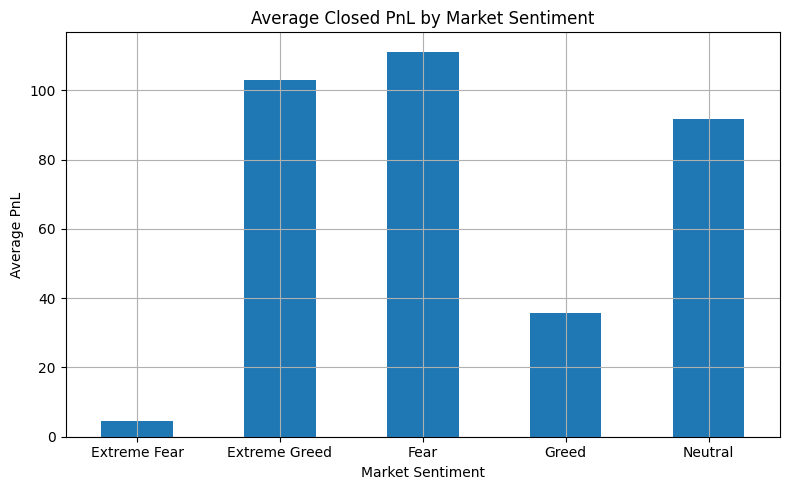

In [46]:
analysis_df.groupby("Classification")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


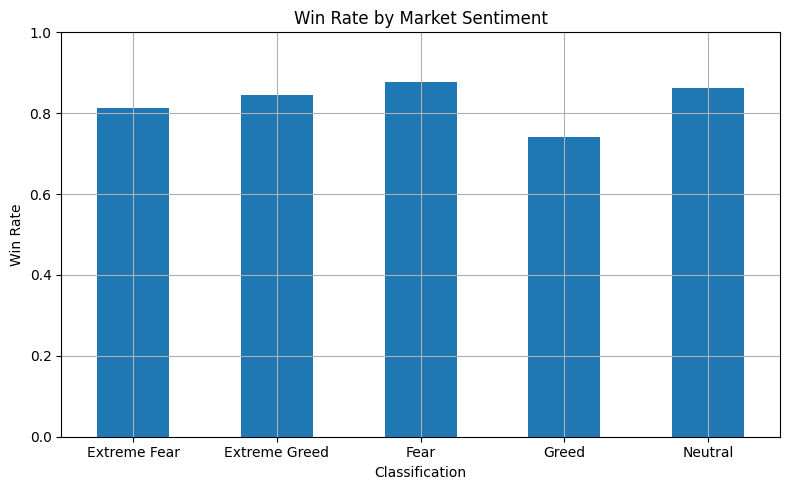

In [47]:
analysis_df.groupby("Classification")["win"].mean().plot(kind="bar")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


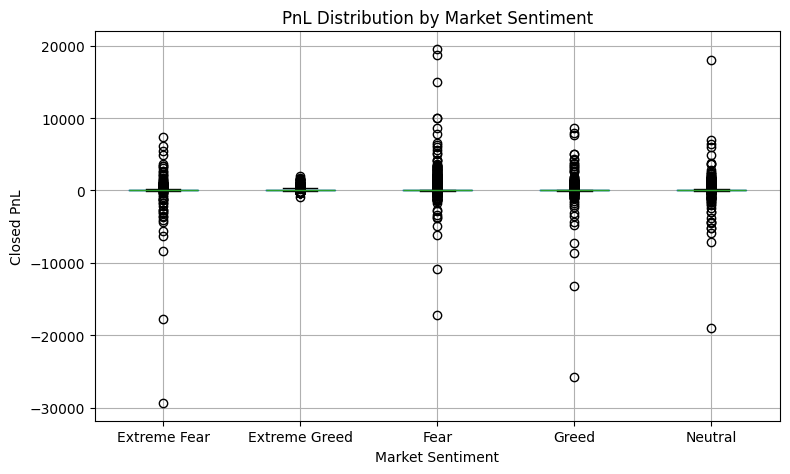

In [48]:
analysis_df.boxplot(column="Closed PnL", by="Classification")
plt.title("PnL Distribution by Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.show()


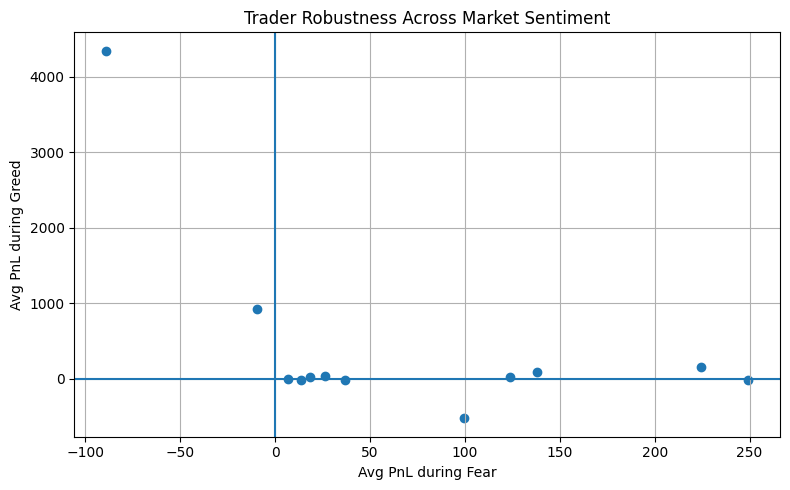

In [49]:
trader_perf = analysis_df.groupby(
    ["Account", "Classification"]
)["Closed PnL"].mean().unstack()

plt.scatter(trader_perf["Fear"], trader_perf["Greed"])
plt.axhline(0)
plt.axvline(0)
plt.xlabel("Avg PnL during Fear")
plt.ylabel("Avg PnL during Greed")
plt.title("Trader Robustness Across Market Sentiment")
plt.tight_layout()
plt.show()


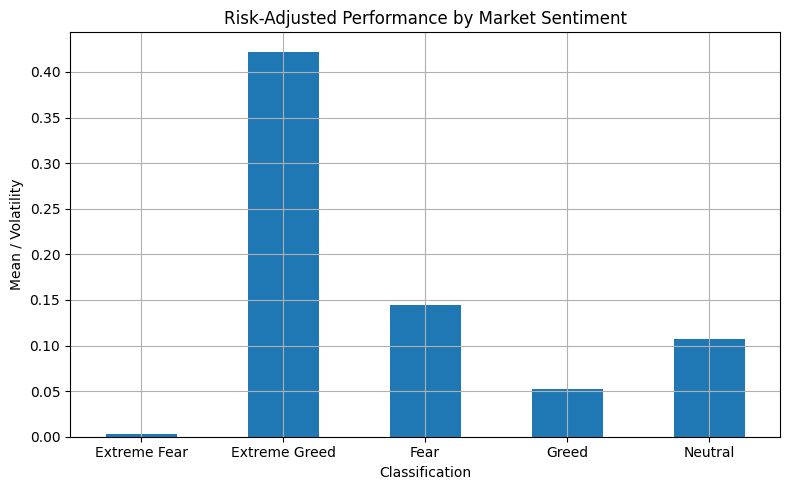

In [50]:
risk_adjusted = analysis_df.groupby("Classification")["Closed PnL"].agg(
    mean="mean",
    std="std"
)

risk_adjusted["risk_adjusted_return"] = (
    risk_adjusted["mean"] / risk_adjusted["std"]
)

risk_adjusted["risk_adjusted_return"].plot(kind="bar")
plt.title("Risk-Adjusted Performance by Market Sentiment")
plt.ylabel("Mean / Volatility")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


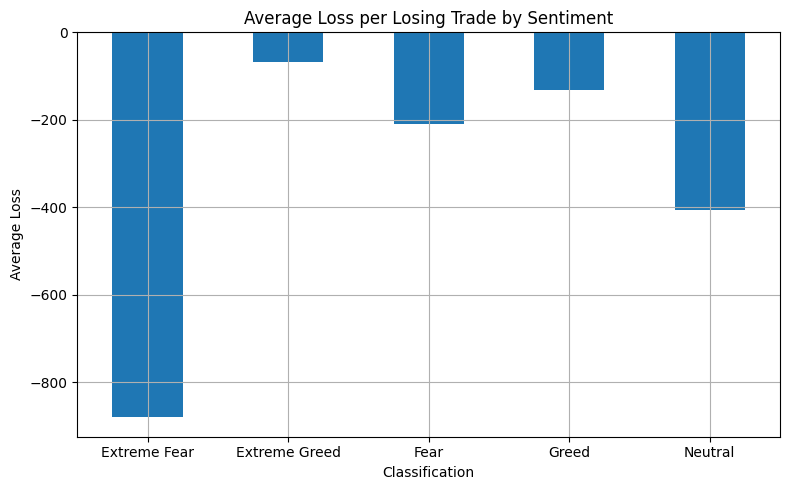

In [51]:
losses = analysis_df[analysis_df["Closed PnL"] < 0]

losses.groupby("Classification")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average Loss per Losing Trade by Sentiment")
plt.ylabel("Average Loss")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3068913742.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10 = analysis_df.groupby("Classification").apply(


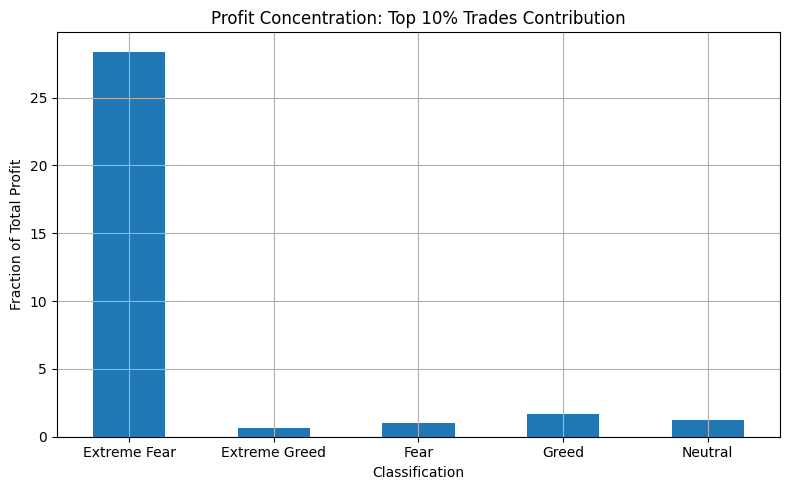

In [52]:
top_10 = analysis_df.groupby("Classification").apply(
    lambda x: x["Closed PnL"].nlargest(int(0.1 * len(x))).sum()
)

total = analysis_df.groupby("Classification")["Closed PnL"].sum()

(top_10 / total).plot(kind="bar")
plt.title("Profit Concentration: Top 10% Trades Contribution")
plt.ylabel("Fraction of Total Profit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-900347473.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_df.groupby(


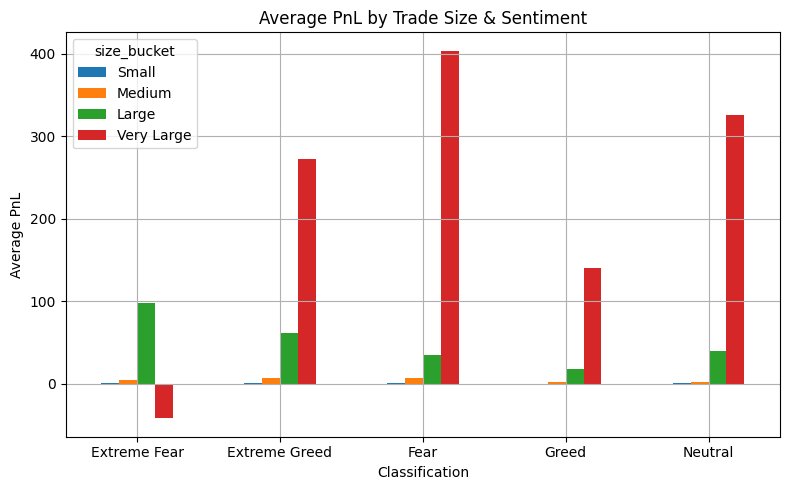

In [53]:
analysis_df["size_bucket"] = pd.qcut(
    analysis_df["Size Tokens"], 4, labels=["Small", "Medium", "Large", "Very Large"]
)

analysis_df.groupby(
    ["Classification", "size_bucket"]
)["Closed PnL"].mean().unstack().plot(kind="bar")

plt.title("Average PnL by Trade Size & Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


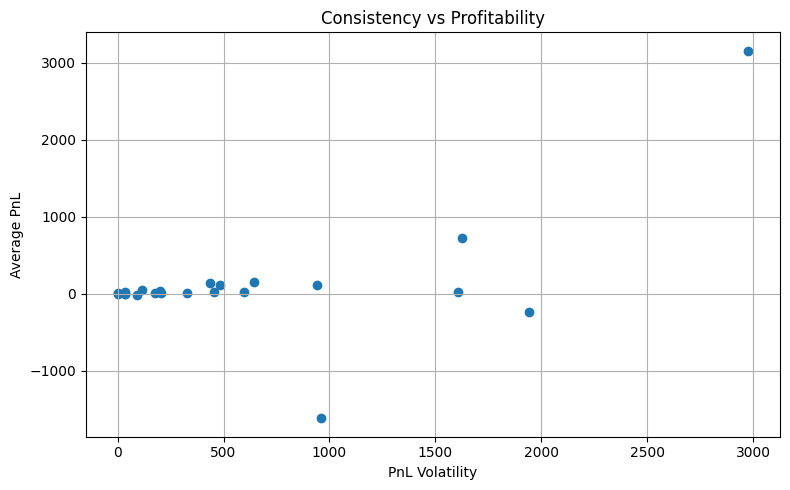

In [54]:
trader_stats = analysis_df.groupby("Account").agg(
    avg_pnl=("Closed PnL", "mean"),
    volatility=("Closed PnL", "std")
)

plt.scatter(trader_stats["volatility"], trader_stats["avg_pnl"])
plt.xlabel("PnL Volatility")
plt.ylabel("Average PnL")
plt.title("Consistency vs Profitability")
plt.tight_layout()
plt.show()


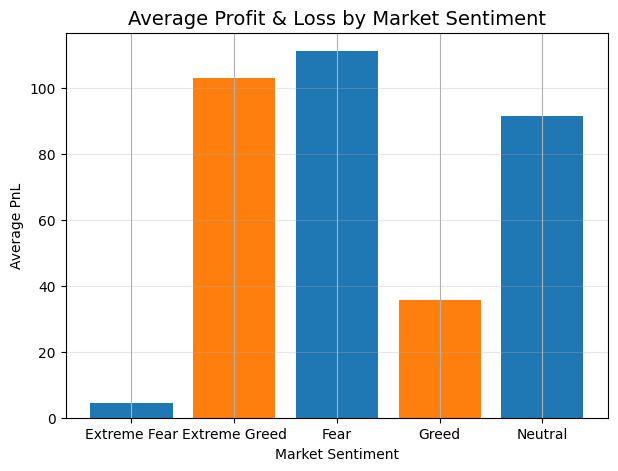

In [55]:
avg_pnl = analysis_df.groupby("Classification")["Closed PnL"].mean()

plt.figure(figsize=(7,5))
plt.bar(avg_pnl.index, avg_pnl.values, color=["#1f77b4", "#ff7f0e"])
plt.title("Average Profit & Loss by Market Sentiment", fontsize=14)
plt.ylabel("Average PnL")
plt.xlabel("Market Sentiment")
plt.grid(axis="y", alpha=0.3)
plt.show()


<Figure size 700x500 with 0 Axes>

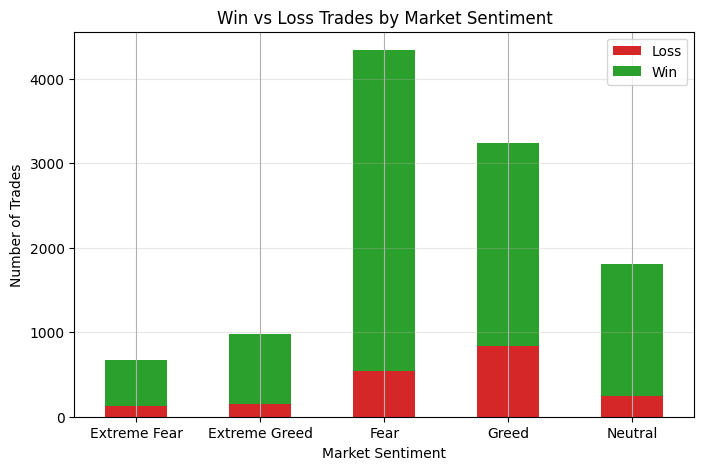

In [56]:
win_loss = analysis_df.groupby(["Classification", "win"]).size().unstack()

plt.figure(figsize=(7,5))
win_loss.plot(
    kind="bar",
    stacked=True,
    color=["#d62728", "#2ca02c"]
)

plt.title("Win vs Loss Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.legend(["Loss", "Win"])
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()


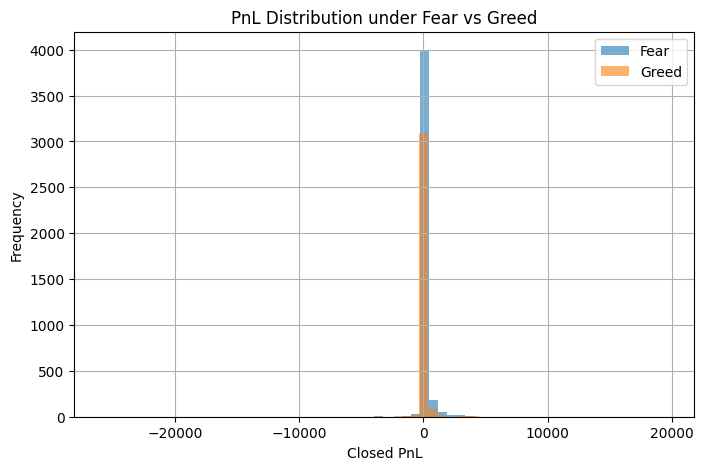

In [57]:
plt.figure(figsize=(8,5))

for sentiment, color in zip(
    ["Fear", "Greed"], ["#1f77b4", "#ff7f0e"]
):
    subset = analysis_df[analysis_df["Classification"] == sentiment]
    plt.hist(
        subset["Closed PnL"],
        bins=50,
        alpha=0.6,
        label=sentiment,
        color=color
    )

plt.title("PnL Distribution under Fear vs Greed")
plt.xlabel("Closed PnL")
plt.ylabel("Frequency")
plt.legend()
plt.show()


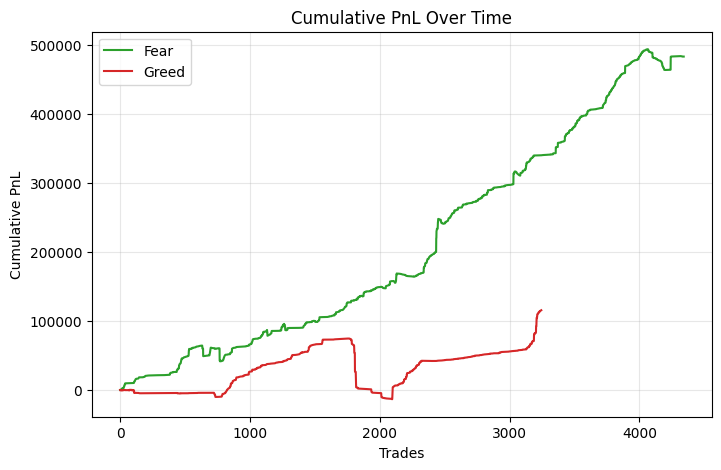

In [59]:
plt.figure(figsize=(8,5))

for sentiment, color in zip(
    ["Fear", "Greed"], ["#2ca02c", "#d62728"]
):
    subset = analysis_df[analysis_df["Classification"] == sentiment]
    cum_pnl = subset.sort_values("Timestamp IST")["Closed PnL"].cumsum()
    plt.plot(cum_pnl.values, label=sentiment, color=color)

plt.title("Cumulative PnL Over Time")
plt.xlabel("Trades")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


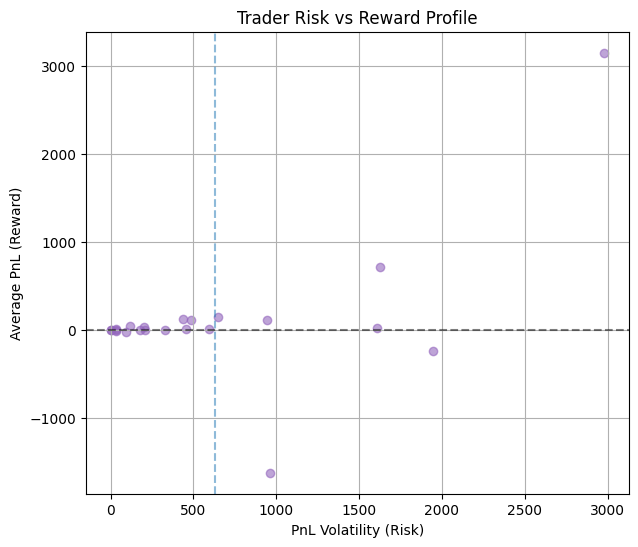

In [60]:
trader_stats = analysis_df.groupby("Account").agg(
    avg_pnl=("Closed PnL", "mean"),
    volatility=("Closed PnL", "std")
)

plt.figure(figsize=(7,6))
plt.scatter(
    trader_stats["volatility"],
    trader_stats["avg_pnl"],
    color="#9467bd",
    alpha=0.6
)

plt.axhline(0, color="black", linestyle="--", alpha=0.5)
plt.axvline(trader_stats["volatility"].mean(), linestyle="--", alpha=0.5)

plt.title("Trader Risk vs Reward Profile")
plt.xlabel("PnL Volatility (Risk)")
plt.ylabel("Average PnL (Reward)")
plt.show()


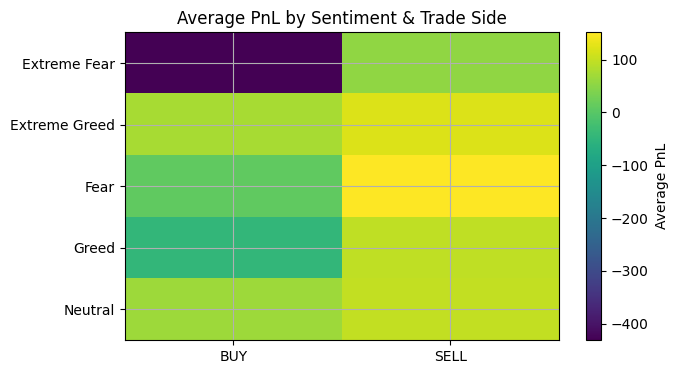

In [61]:
pivot = analysis_df.pivot_table(
    values="Closed PnL",
    index="Classification",
    columns="Side",
    aggfunc="mean"
)

plt.figure(figsize=(7,4))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Average PnL")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Average PnL by Sentiment & Trade Side")
plt.show()


In [65]:
import seaborn as sns


In [66]:
sns.set_theme(style="whitegrid", palette="Set2")


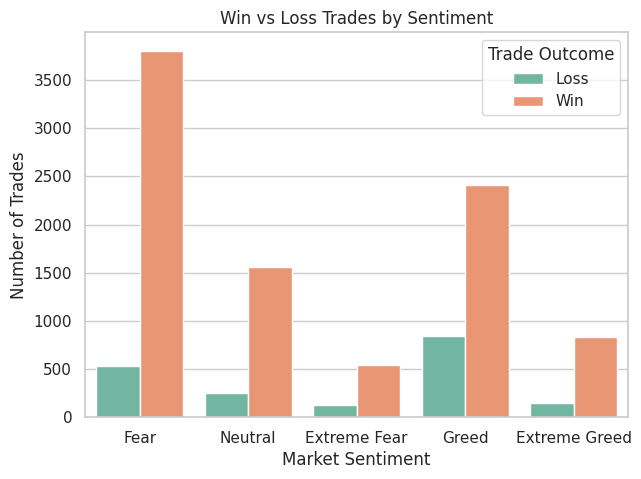

In [70]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=analysis_df,
    x="Classification",
    hue="win"
)
plt.title("Win vs Loss Trades by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Trade Outcome", labels=["Loss", "Win"])
plt.show()


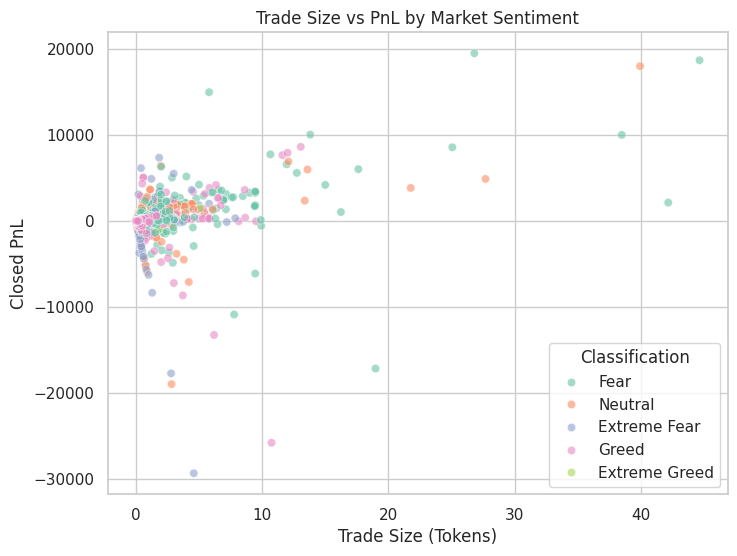

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=analysis_df,
    x="Size Tokens",
    y="Closed PnL",
    hue="Classification",
    alpha=0.6
)
plt.title("Trade Size vs PnL by Market Sentiment")
plt.xlabel("Trade Size (Tokens)")
plt.ylabel("Closed PnL")
plt.show()


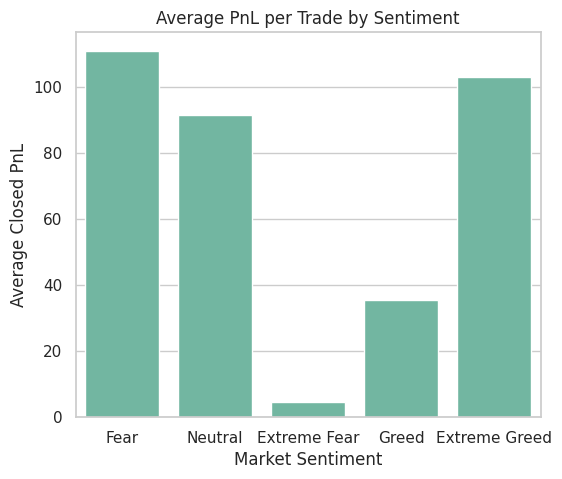

In [73]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=analysis_df,
    x="Classification",
    y="Closed PnL",
    estimator="mean",
    errorbar=None
)
plt.title("Average PnL per Trade by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()


In [75]:
corr_df = analysis_df[[
    "Closed PnL",
    "Execution Price",
    "Size Tokens",
    "Size USD",
    "Fee"
]].dropna()


In [76]:
corr_matrix = corr_df.corr()
corr_matrix


,Closed PnL,Execution Price,Size Tokens,Size USD,Fee
Closed PnL,1.000000,0.014642,0.382526,0.385604,0.163751
Execution Price,0.014642,1.000000,-0.001447,0.029069,0.040545
Size Tokens,0.382526,-0.001447,1.000000,0.997410,0.731855
Size USD,0.385604,0.029069,0.997410,1.000000,0.739250
Fee,0.163751,0.040545,0.731855,0.739250,1.000000


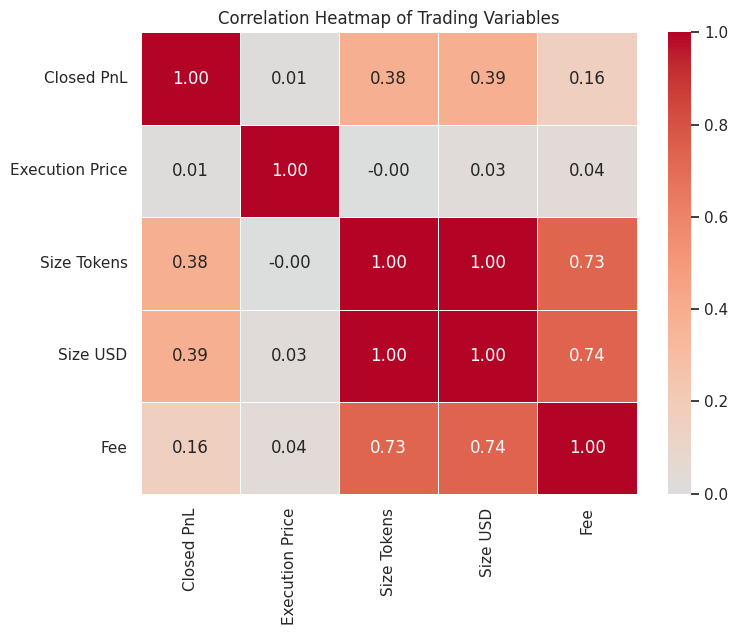

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Trading Variables")
plt.show()
